<a href="https://colab.research.google.com/github/mitresthen/phys117_2021/blob/main/SphaleronsVBlackHoles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
import math
from google.colab import drive
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, MultipleLocator
import matplotlib.ticker as ticker
import statistics

In [149]:
colmapper = {
    "typ" : 0,
    "eta" : 1,
    "phi" : 2,
    "pt" : 3,
    "jmass" : 4,
    "ntrk" : 5,
    "btag" : 6,
    "hadem" : 7,
}

objectMapping = {
    0 : "Photon",
    1 : "Electron",
    2 : "Muon",
    3 : "Tau",
    4 : "Jet",
    6 : "MTE"
}

inclusiveObjectMapping = {
    0 : "Photon",
    1 : "Electron",
    2 : "Muon",
    3 : "Tau",
    4 : "Jet",
    6 : "MTE",
    7 : "Total"
}

In [150]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [151]:
class DataSet:              #
  data = []
  def __init__(self,path):
    self.path = path
    self.data = self.__readData()
    self.fileName = Path(self.path).stem
  def __readData(self):
    matrices = []
    with open(self.path, 'r') as file:
      matrix = []
      for line in file:
        elements = line.split()
        if elements[0] == "#":
          continue
        if elements[0] == "0":
          if len(matrix) != 0:
            matrices.append(matrix)
            matrix = []
          continue
        vector = []
        objType = int(elements[1])
        vector.append(objType)
        for i in range (2, 10):
          elem = float(elements[i])
          vector.append(elem)
        if vector[3] > 15:
          matrix.append(vector)
      if len(matrix) != 0:
       matrices.append(matrix)
    return matrices



In [152]:
class DataSet:                              #Filters and counts number of objects rejected.
  data = []
  def __init__(self,path):
    self.path = path
    self.data = self.__readData()
    self.fileName = Path(self.path).stem
  def __readData(self):
      matrices = []
      countUnder15 = 0
      countUnder20 = 0
      with open(self.path, 'r') as file:
        matrix = []
        for line in file:
          elements = line.split()
          if elements[0] == "#":
            continue
          if elements[0] == "0":
            if len(matrix) != 0:
              matrices.append(matrix)
              matrix = []
            continue
          vector = []
          objType = int(elements[1])
          vector.append(objType)
          for i in range (2, 10):
            elem = float(elements[i])
            vector.append(elem)
          if vector[0] == 0 or vector[0] == 1 or vector[0] == 2:
            if vector[3] > 15:
              matrix.append(vector)
            elif vector[3] <= 15:
              countUnder15 += 1    #count for objects rejected of type photon, electron, muon.
          elif vector[0] == 3 or vector[0] == 4:    
            if vector[3] > 20:
              matrix.append(vector)
            elif vector[3] <= 20:
              countUnder20 += 1   #count for objects rejected of type Tau, Jet
          else : matrix.append(vector)
        if len(matrix) != 0:
          matrices.append(matrix)
      print(f'{Path(self.path).stem} count of rejected Photon, Electron, Muon: {countUnder15}')   
      print(f'{Path(self.path).stem} count of rejected Tau, Jet: {countUnder20}')   
      return matrices

In [153]:
BlackMaxOutputPath = "/content/drive/MyDrive/Colab Notebooks/Phys117Data/BlackMaxOutputFirstRun/BlackMaxOutputFirstRun.lhco"
BlackMaxOutput2Path = "/content/drive/MyDrive/Colab Notebooks/Phys117Data/BlackMaxOutputFirstRun/BlackMaxOutputFirstRun2.lhco"
Sph13Path = "/content/drive/MyDrive/Colab Notebooks/Phys117Data/spharelon_events_for_ML/PP13-Sphaleron-THR9-FRZ15-NB33-71-NSUBP5.lhco"
paths = [
  BlackMaxOutputPath,
  BlackMaxOutput2Path,
  Sph13Path
  ]
dataSets = []

for path in paths:
  dataset = DataSet(path)
  dataSets.append(dataset)
  print(len(dataset.data))
print(dataSets)


BlackMaxOutputFirstRun count of rejected Photon, Electron, Muon: 95
BlackMaxOutputFirstRun count of rejected Tau, Jet: 0
10000
BlackMaxOutputFirstRun2 count of rejected Photon, Electron, Muon: 89
BlackMaxOutputFirstRun2 count of rejected Tau, Jet: 0
10000
PP13-Sphaleron-THR9-FRZ15-NB33-71-NSUBP5 count of rejected Photon, Electron, Muon: 78
PP13-Sphaleron-THR9-FRZ15-NB33-71-NSUBP5 count of rejected Tau, Jet: 0
1000
[<__main__.DataSet object at 0x7f5220f1fc50>, <__main__.DataSet object at 0x7f5220f1f490>, <__main__.DataSet object at 0x7f52210812d0>]


In [154]:

def getObjectCounts(matrix):
  maxObjects = 0
  for matrice in matrix:
    if(len(matrice) > maxObjects):
      maxObjects = len(matrice)
  counts = [0] * (maxObjects+1)
  for matrice in matrix:
    counts[len(matrice)] += 1
  return counts


In [155]:
def getSpecificObjectCounts(matrix, objectType):
  maxObjects = 0
  for event in matrix:
    sumOfThisObject = 0
    for obj in event:
      if obj[0] == int(objectType):
        sumOfThisObject += 1
    if sumOfThisObject > maxObjects:
      maxObjects = sumOfThisObject
  print(f'Found event with max {maxObjects} of type {objectMapping[objectType]}')
  counts = [0] * (maxObjects+1)
  for event in matrix:
    sumOfThisObject = 0
    for obj in event:
      if obj[0] == int(objectType):
        sumOfThisObject += 1
    counts[sumOfThisObject] += 1
  return counts


In [156]:
def plotObjectDistribution(binnedObjects, title):
  xVals = list(range(0,len(binnedObjects)))
  if(len(xVals) != len(binnedObjects)):
    print("Size different")
  plt.bar(xVals, binnedObjects)
  plt.title(title)
  plt.show()

In [157]:
def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True, alignment="center"):
    """Draws a bar plot with multiple bars per data point.

    Parameters
    ----------
    ax : matplotlib.pyplot.axis
        The axis we want to draw our plot on.

    data: dictionary
        A dictionary containing the data we want to plot. Keys are the names of the
        data, the items is a list of the values.

        Example:
        data = {
            "x":[1,2,3],
            "y":[1,2,3],
            "z":[1,2,3],
        }

    colors : array-like, optional
        A list of colors which are used for the bars. If None, the colors
        will be the standard matplotlib color cyle. (default: None)

    total_width : float, optional, default: 0.8
        The width of a bar group. 0.8 means that 80% of the x-axis is covered
        by bars and 20% will be spaces between the bars.

    single_width: float, optional, default: 1
        The relative width of a single bar within a group. 1 means the bars
        will touch eachother within a group, values less than 1 will make
        these bars thinner.

    legend: bool, optional, default: True
        If this is set to true, a legend will be added to the axis.
    """

    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    final_width = bar_width * single_width

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = 0
        if alignment == "center":
          x_offset += (i - n_bars / 2) * final_width  + final_width / 2
        elif alignment == "right":
            x_offset += i*final_width + final_width / 2
        
        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=final_width, color=colors[i % len(colors)])

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys())


def comparativePlot(binnedObjectSets, title):
  fig, ax = plt.subplots()
  dataDict = {}
  for filename, binnedObjects in binnedObjectSets:
    dataDict[filename] = binnedObjects

  bar_plot(ax, dataDict, total_width=.8, single_width=.9)
  plt.title(title)
  plt.show()

In [158]:
def normalizeObjectCounts(objectCounts):
  nrOfObjects = sum(objectCounts)
  return [i/nrOfObjects for i in objectCounts]

def normalizeObjectCounts2d(objectCounts2d):
  normalizedObjectCounts2d = []
  for objectCounts in objectCounts2d:
    normalizedObjectCounts = normalizeObjectCounts(objectCounts)
    normalizedObjectCounts2d.append(normalizedObjectCounts)
  return normalizedObjectCounts2d
    
  

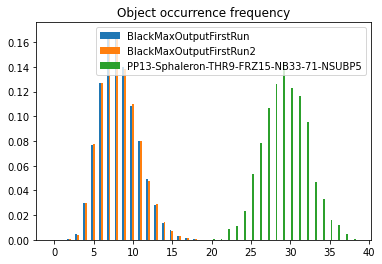

Found event with max 3 of type Photon
Found event with max 2 of type Photon
Found event with max 7 of type Photon


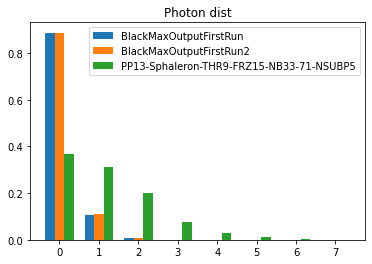

Found event with max 4 of type Electron
Found event with max 4 of type Electron
Found event with max 6 of type Electron


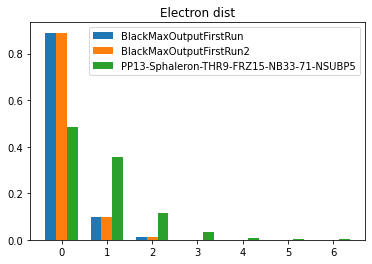

Found event with max 3 of type Muon
Found event with max 3 of type Muon
Found event with max 4 of type Muon


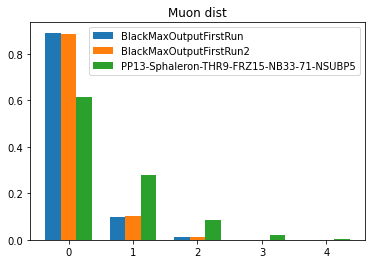

Found event with max 4 of type Tau
Found event with max 3 of type Tau
Found event with max 8 of type Tau


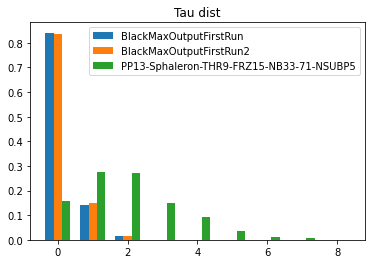

Found event with max 18 of type Jet
Found event with max 19 of type Jet
Found event with max 34 of type Jet


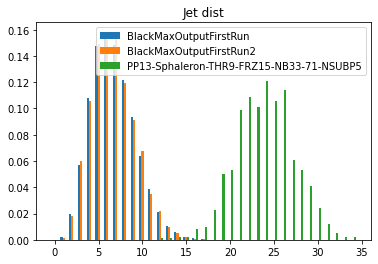

Found event with max 1 of type MTE
Found event with max 1 of type MTE
Found event with max 1 of type MTE


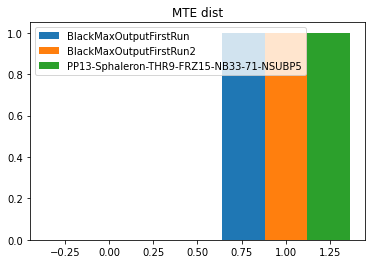

In [159]:
def plotComparativeTotalObjectDistribution():
  objectCounts=[]
  for dataSet in dataSets:
    objectCounts.append((dataSet.fileName, normalizeObjectCounts(getObjectCounts(dataSet.data))))
  comparativePlot(objectCounts, "Object occurrence frequency")

def plotComparativeSpecificObjectDistribution():
    for objectType in objectMapping:
        specificCounts = []
        for dataSet in dataSets:
          specificCounts.append((dataSet.fileName, normalizeObjectCounts(getSpecificObjectCounts(dataSet.data, objectType))))
        comparativePlot(specificCounts, f'{objectMapping[objectType]} dist')

plotComparativeTotalObjectDistribution()
plotComparativeSpecificObjectDistribution()

In [160]:
noEmptyObjects = False         #Removes datapoints with PT = 0.
useSumMultiplicity = False     #If True, energy of each objecttype is summed per event.
normalizePTPlot = True        #Probabillity density plot.

def getSpecificObjectEnergy(matrices,objectType):
  pTListSpecific = []
  for matrix in matrices:
    for obj in matrix:
      if obj[0] == int(objectType):
        pTListSpecific.append(float(obj[3]))
  return pTListSpecific 

def getTotalObjectEnergyPerEvent(matrices, objectType):   #sums energy for objects of same type in an event. Gives lots of 0 values.
  pTTotal = []
  for matrix in matrices:
    pTForObjType = 0
    for obj in matrix:
      if obj[0] == int(objectType):
        pTForObjType += float(obj[3])
    if noEmptyObjects == True and pTForObjType != 0:
      pTTotal.append(pTForObjType)
    elif noEmptyObjects == False:
      pTTotal.append
    else: continue
  return pTTotal

def sumPT(matrices):
  pTListTotal = []
  for matrix in matrices:
    pT = 0
    for obj in matrix:
      pT += float(obj[3])
    pTListTotal.append(pT) 
  return pTListTotal

def plotSumPT(pTList,fileName):
  maxpT = max(pTList)
  title = fileName + " sum of pT"
  print("The highest transverse energy of a ", fileName, " event was: ", maxpT, "[GeV/c].")
  plt.hist(pTList, bins=20)
  plt.title(title)
  plt.xlabel("energy of events  [GeV]")
  plt.ylabel("number of events")
  plt.show()
  plt.close()

def plotSpecificpT(pTList,objectType,fileName):
  maxpT = max(pTList)
  title = f"{fileName} {objectMapping[objectType]} sum of pT"
  print(f"The highest transverse energy of a {objectMapping[objectType]} was: {maxpT} [GeV/c].")
  plt.hist(pTList, bins=20)
  plt.title(title)
  plt.xlabel("energy of objects  [GeV]")
  plt.ylabel("number of objects")
  plt.show()
  plt.close()

def plotBaseEnergy(dataSet):
  for objectType in objectMapping:
    pTListSpecific = getSpecificObjectEnergy(dataSet.data, objectType)
    plotSpecificpT(pTListSpecific, objectType, dataSet.fileName)

Plot av MTE til total PT ratio:
For hver event:
1. finn total pt inkludert mte sin pt
2. finn mte for event
3. finn ratio = mte/totalPt og lagre slik at vi vet hvilken ratio som hører til hvilken event.
4. lag histogram

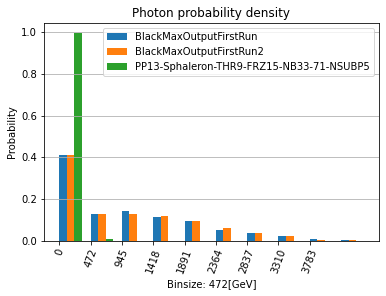

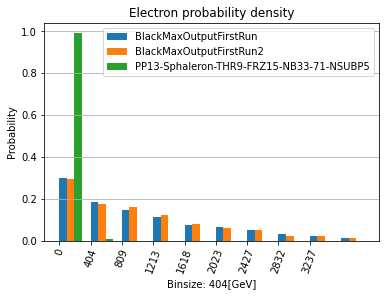

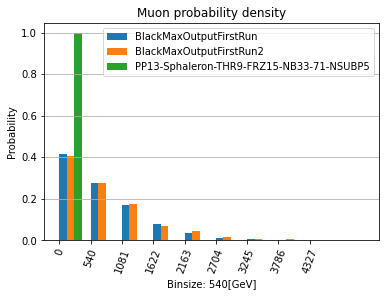

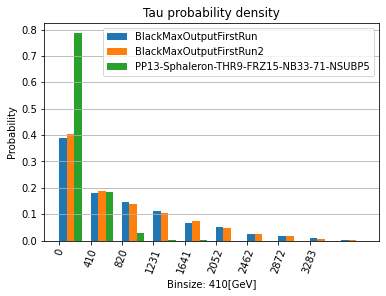

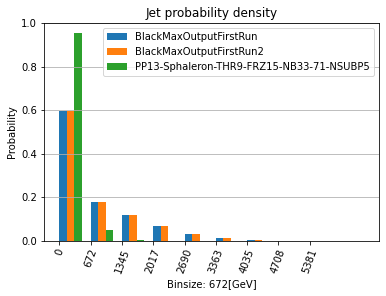

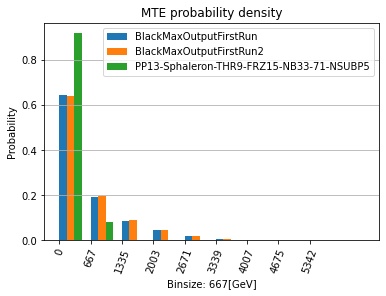

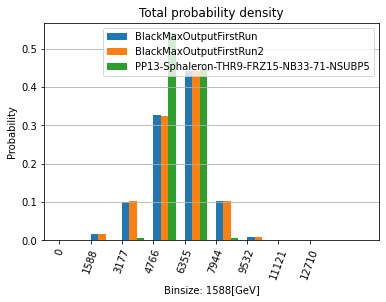

In [161]:
def mapPT():
  mapPT = {}
  for dataSet in dataSets:
    for obj in inclusiveObjectMapping:
      if obj != 7:
        if useSumMultiplicity == True:
          mapPT[dataSet.fileName, obj] = getTotalObjectEnergyPerEvent(dataSet.data, obj)
        elif useSumMultiplicity == False:
          mapPT[dataSet.fileName, obj] = getSpecificObjectEnergy(dataSet.data, obj)
      elif obj == 7:
        mapPT[dataSet.fileName, obj] = sumPT(dataSet.data)
  return mapPT

def makeBins(mapPT=mapPT(), binNr=10):
  mapBins = {}
  mapBinSize = {}
  for objectType in inclusiveObjectMapping:
    maxXVal = 0
    minXVal = 0
    bins = []
    for dataSet in dataSets:
      currentMaxXVal = max(mapPT[dataSet.fileName, objectType])
      if maxXVal < currentMaxXVal:
        maxXVal = currentMaxXVal
    binSize = (maxXVal - minXVal)/binNr
    mapBinSize[objectType] = binSize
    for i in range(binNr):
      bins.append(i*binSize)
    mapBins[objectType] = bins
  return mapBins, binNr, mapBinSize

def binEnergyCount(mapPT=mapPT(), binsData=makeBins()):
  mapBins, binNr, mapBinSize = binsData
  mapBinnedEnergyCount = {}
  for objectType in inclusiveObjectMapping:
    binSize = mapBinSize[objectType]
    for dataSet in dataSets:
      binnedEnergyCount = [0]*binNr
      lowValueCount = 0
      for i, binXVal in enumerate(mapBins[objectType]):
        for value in mapPT[dataSet.fileName, objectType]:
          if (value >= binXVal) and (value < (binXVal+binSize)) and (i <= binNr-1):
            binnedEnergyCount[i] += 1
          if (value >= 0) and (value < 1):
            lowValueCount += 1
      #print(f'{dataSet.fileName}, {objectType}, {lowValueCount} objects of pt less than 1')
      mapBinnedEnergyCount[dataSet.fileName, objectType] = binnedEnergyCount
  return mapBinnedEnergyCount

def combineBins(mapBinnedEnergyCount=binEnergyCount()):
  combinedEnergyMap = {}
  for objectType in inclusiveObjectMapping:
    combinedEnergySet = []
    for dataSet in dataSets:
      combinedEnergySet.append(mapBinnedEnergyCount[dataSet.fileName, objectType])
    combinedEnergyMap[objectType] = combinedEnergySet
  return combinedEnergyMap


def comparativePTPlot(binnedObjectSets, title, objectType, binInfo=makeBins()):
  fig, ax = plt.subplots()
  mapBins, binNr, binSize = binInfo
  ticks = []
  labels = []
  for i in range(binNr-1):
    a = int(i)
    ticks.append(a)
    labels.append(int((a)*binSize[objectType]))
  dataDict = {}
  for filename, binnedObjects in binnedObjectSets:
    dataDict[filename] = binnedObjects

  bar_plot(ax, dataDict, total_width=.8, single_width=.9, alignment="right")
  plt.title(title)
  plt.xticks(ticks=ticks, labels=labels, rotation=70)
  if normalizePTPlot == True:
    plt.ylabel(f'Probability')
  if normalizePTPlot == False:
    plt.ylabel(f'counts') 
  plt.xlabel(f'Binsize: {int(binSize[objectType])}[GeV]')
  plt.grid(axis='y')
  plt.show()


def plotComparativeSpecificObjectEnergyDistribution(binEnergyCount=binEnergyCount()):
    for objectType in inclusiveObjectMapping:
      specificCounts = []     
      for dataSet in dataSets:
        if normalizePTPlot == True:
          tmp = normalizeObjectCounts(binEnergyCount[dataSet.fileName, objectType])
          specificCounts.append((dataSet.fileName, tmp))
          norm = 'probability density'
        if normalizePTPlot == False:
          norm = 'dist'
          specificCounts.append((dataSet.fileName, binEnergyCount[dataSet.fileName, objectType]))
      comparativePTPlot(specificCounts, f'{inclusiveObjectMapping[objectType]} {norm}', objectType)

plotComparativeSpecificObjectEnergyDistribution()

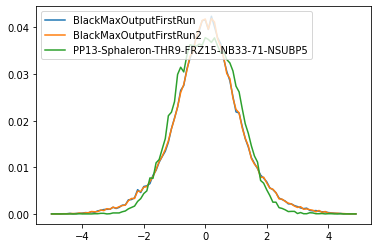

In [162]:
#Eta distribution of jets

def getAllEtas(dataSet):
  objectType = 4
  etaValues = []
  for matrix in dataSet.data:
    for obj in matrix:
      if obj[0] == objectType:
        etaValues.append(obj[colmapper["eta"]])
  return etaValues

def plotAllEtaNormalizedDist():
  etas = {} 
  bins = np.arange(-5.0, 5.0, 0.1)
  for dataSet in dataSets:
    hist, bins = np.histogram(getAllEtas(dataSet), bins)
    normalizedHist = normalizeObjectCounts(hist)
    plt.plot(bins, np.pad(normalizedHist, (1,0)), label = dataSet.fileName)

  plt.legend(loc="upper left")
  plt.show()

plotAllEtaNormalizedDist()

In [163]:
def standardDeviance2D(etaValues):
  std = []
  for etaVals in etaValues:
    std.append(statistics.stdev(etaVals))
  return std

def mean2D(etaValues):
  mean = []
  for etaVals in etaValues:
    mean.append(statistics.mean(etaVals))
  return mean

The highest transverse energy of a  BlackMaxOutputFirstRun  event was:  15888.070000000002 [GeV/c].


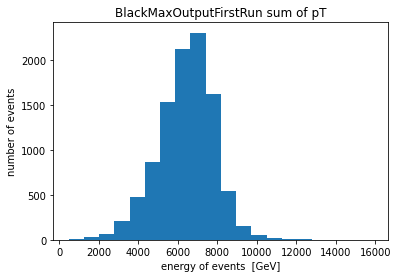

The highest transverse energy of a Photon was: 4605.65 [GeV/c].


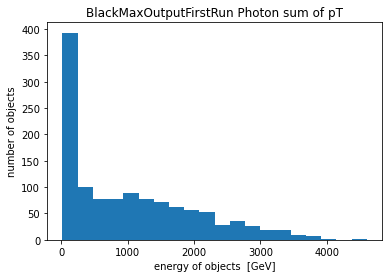

The highest transverse energy of a Electron was: 4033.88 [GeV/c].


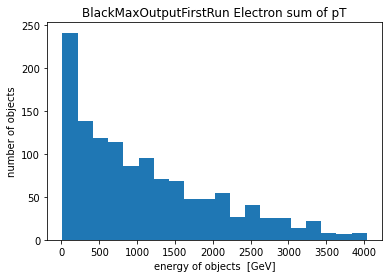

The highest transverse energy of a Muon was: 5113.56 [GeV/c].


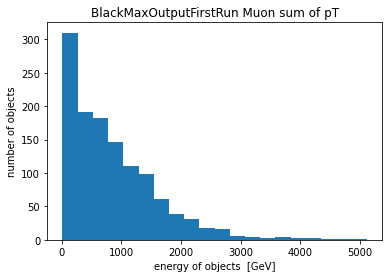

The highest transverse energy of a Tau was: 4104.25 [GeV/c].


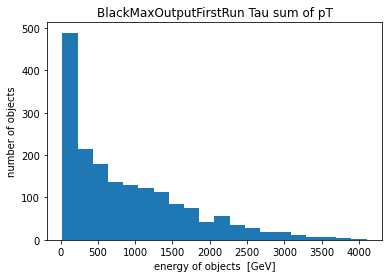

The highest transverse energy of a Jet was: 6726.3 [GeV/c].


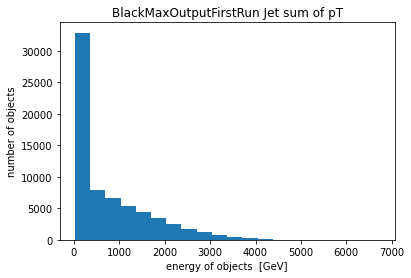

The highest transverse energy of a MTE was: 6678.68 [GeV/c].


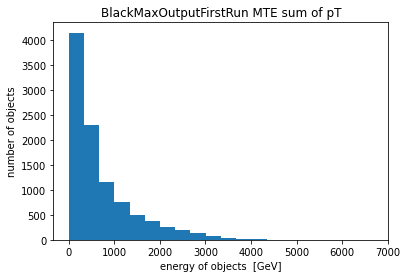

The highest transverse energy of a  BlackMaxOutputFirstRun2  event was:  15196.029999999999 [GeV/c].


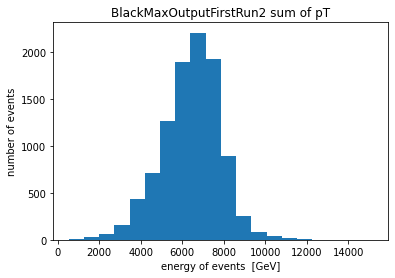

The highest transverse energy of a Photon was: 4729.64 [GeV/c].


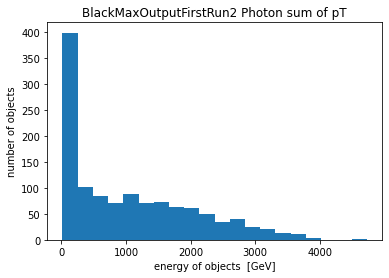

The highest transverse energy of a Electron was: 4046.27 [GeV/c].


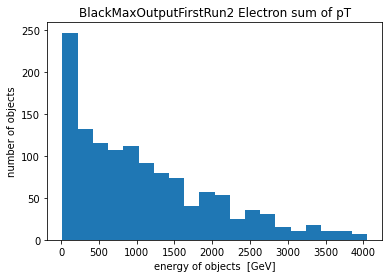

The highest transverse energy of a Muon was: 5409.8 [GeV/c].


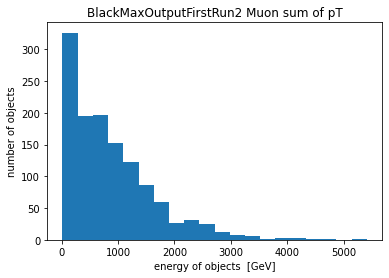

The highest transverse energy of a Tau was: 3894.28 [GeV/c].


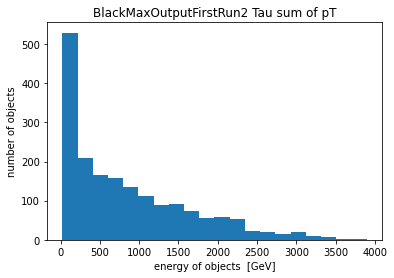

The highest transverse energy of a Jet was: 6392.02 [GeV/c].


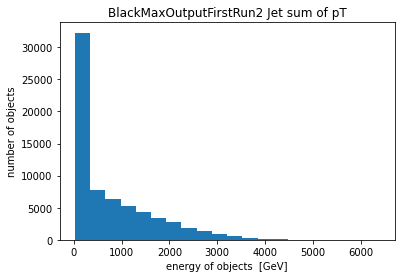

The highest transverse energy of a MTE was: 6329.64 [GeV/c].


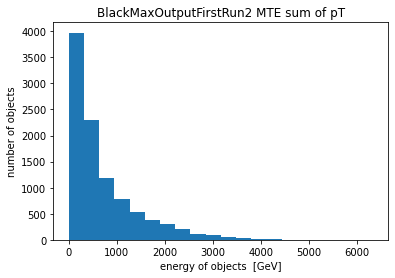

The highest transverse energy of a  PP13-Sphaleron-THR9-FRZ15-NB33-71-NSUBP5  event was:  8317.75 [GeV/c].


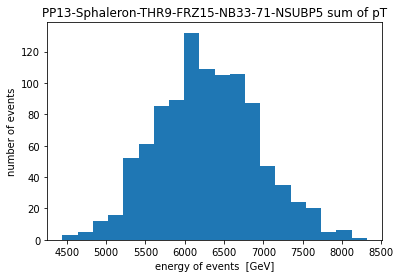

The highest transverse energy of a Photon was: 649.48 [GeV/c].


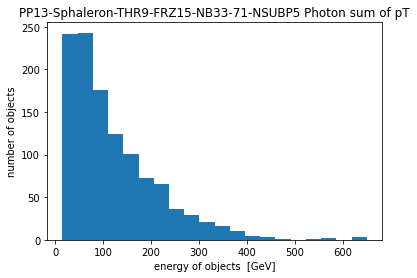

The highest transverse energy of a Electron was: 570.82 [GeV/c].


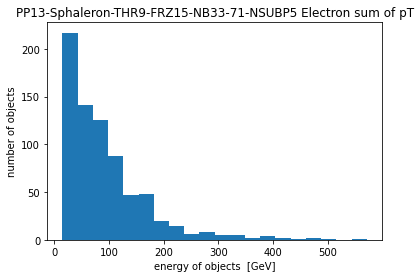

The highest transverse energy of a Muon was: 664.67 [GeV/c].


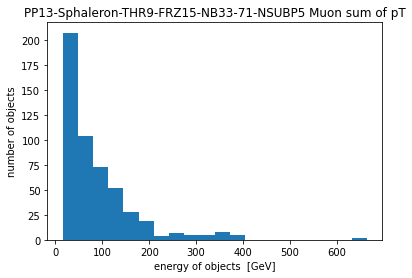

The highest transverse energy of a Tau was: 1700.47 [GeV/c].


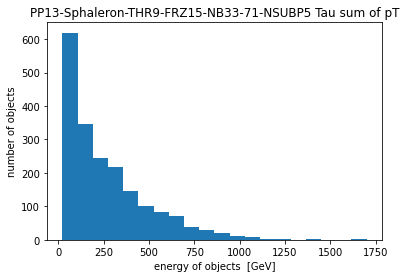

The highest transverse energy of a Jet was: 1675.0 [GeV/c].


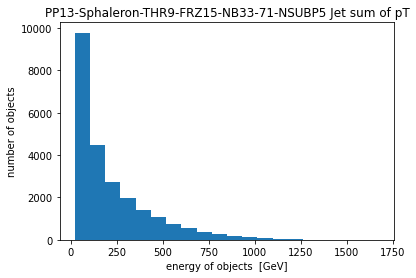

The highest transverse energy of a MTE was: 1119.1 [GeV/c].


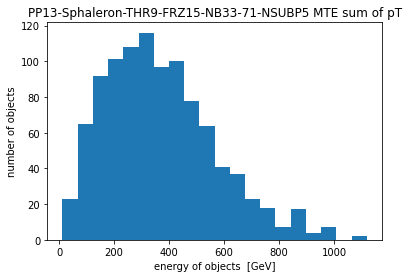

In [164]:
for dataset in dataSets:
  pTListTotal = sumPT(dataset.data)
  plotSumPT(pTListTotal, dataset.fileName)
  plotBaseEnergy(dataset)

eta = -np.log(np.tan(theta/2.))


theta = 2 atan(e**-eta)

tetha/2 = atan(e**-eta) = atan(pT/pz)

e**-eta = pT/pz
pz = e**eta * pT
p = sqrt(pz**2 + pT**2)

p = sqrt(((e**eta)*pT)**2 +pT**2)
p = sqrt((pT**2) * ((e**2eta) + 1))

#firervektor blir da

pc = c * sqrt((pT**2) * ((e**2eta) + 1))
px = pT * cos(phi)
py = pT * sin(phi)
pz = pT*(e**eta)

per dataset:
  1. summer energi per objekt-type & plot i ett image per objekt-type
  2. finn maxval per objekt-type
  3. normaliser alle imager basert på maxval for sin objekt-type
  4. slå sammen imager for electron, muon og jets per event

In [165]:
def normalizeEnergyImages(objTypeToMaxVal, imageSet):
  normalizedImages = {}
  for imageKey in imageSet:                  
    filename, eventNr, objectType = imageKey
    image = imageSet[imageKey]
    currMaxVal = objTypeToMaxVal[objectType]
    for coord in image:
      x, y = coord
      image[(x, y)] = int(255*(image[(x, y)]/currMaxVal))
    normalizedImages[(imageKey)] = image
  return normalizedImages

In [166]:
def createEtaPhiBinnedImages(dataSet, 
                             imageHeight, 
                             imageWidth, 
                             maxEta, 
                             minEta, 
                             maxPhi, 
                             minPhi):
  objTypeToMaxVal = {}
  images = {}
  scalingFactorEta = imageWidth/(maxEta-minEta)
  scalingFactorPhi = imageHeight/(maxPhi-minPhi)
  for objectType in objectMapping:
    objTypeToMaxVal[objectType] = 0
  for i, event in enumerate(dataSet.data):
    totalPt = 0
    mte = 0

    for objectType in objectMapping:
      image = {}
      for obj in event:
        if int(obj[colmapper["typ"]]) != int(objectType):
          continue
        eta = np.clip(obj[colmapper["eta"]], minEta, maxEta) + abs(minEta)
        convertedEta = max(0, round(eta*scalingFactorEta)-1) 

        phi = obj[colmapper["phi"]] + abs(minPhi)
        convertedPhi = max(0, round(phi*scalingFactorPhi)-1)

        pT = obj[colmapper["pt"]]
        energyP = pT*math.cosh(obj[colmapper["eta"]])

        image[(convertedEta, convertedPhi)] = energyP + image.get((convertedEta, convertedPhi), 0) 

        objTypeToMaxVal[objectType] = max(objTypeToMaxVal[objectType], image[(convertedEta, convertedPhi)] )

      images[(dataSet.fileName, i, objectType)] = image
  return (objTypeToMaxVal, images)

In [167]:
def fillBlanksInImage(sparseImage, height, width):
  newImage = [[ 0 for x in range(0,height)] for y in range(0,width)]
  for coord in sparseImage:
    x, y = coord
    newImage[x][y] = sparseImage[coord]
  return newImage


In [168]:
def mergeImages(height, width, redImage = {}, greenImage = {}, blueImage = {}):
    newImage = [[ (0, 0, 0) for x in range(0,height)] for y in range(0,width)]
    for coord in redImage:
      x, y = coord
      newImage[x][y] += (redImage[coord], 0, 0)
    for coord in greenImage:
      x, y = coord
      newImage[x][y] += (0, greenImage[coord], 0)
    for coord in blueImage:
      x, y = coord
      newImage[x][y] += (0, 0, blueImage[coord])
    return newImage

electron = red, muon = green, jet = blue

('BlackMaxOutputFirstRun', 0)
1109


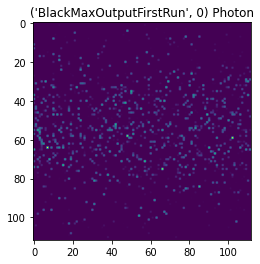

('BlackMaxOutputFirstRun', 1)
1146


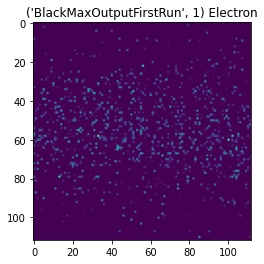

('BlackMaxOutputFirstRun', 2)
1155


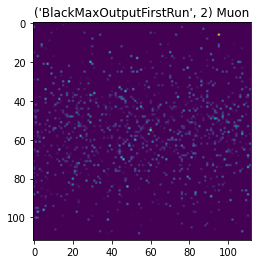

('BlackMaxOutputFirstRun', 3)
1573


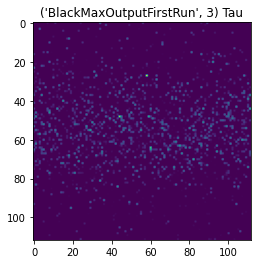

('BlackMaxOutputFirstRun', 4)
11508


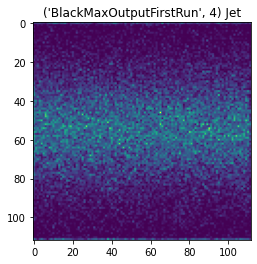

('BlackMaxOutputFirstRun', 6)
112


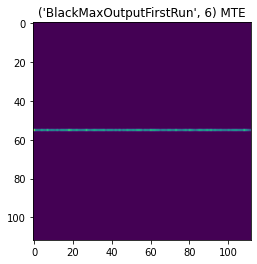

('BlackMaxOutputFirstRun2', 0)
1118


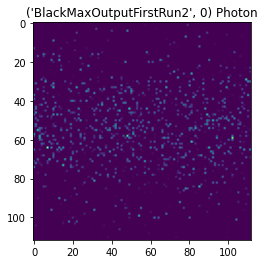

('BlackMaxOutputFirstRun2', 1)
1186


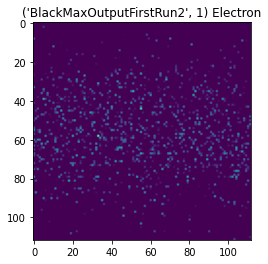

('BlackMaxOutputFirstRun2', 2)
1173


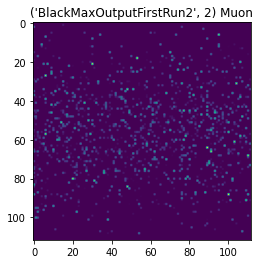

('BlackMaxOutputFirstRun2', 3)
1623


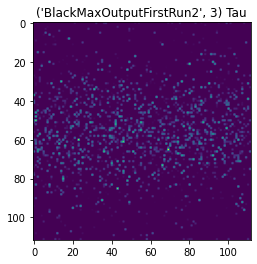

('BlackMaxOutputFirstRun2', 4)
11494


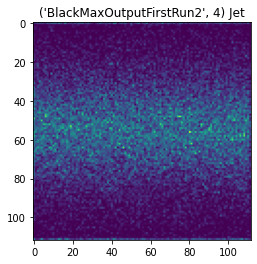

('BlackMaxOutputFirstRun2', 6)
112


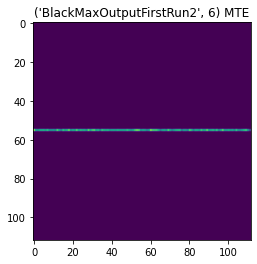

('PP13-Sphaleron-THR9-FRZ15-NB33-71-NSUBP5', 0)
1083


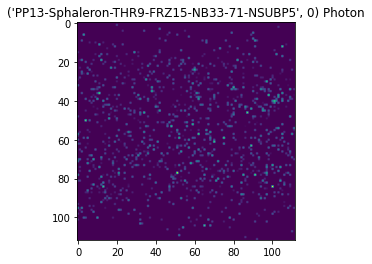

('PP13-Sphaleron-THR9-FRZ15-NB33-71-NSUBP5', 1)
720


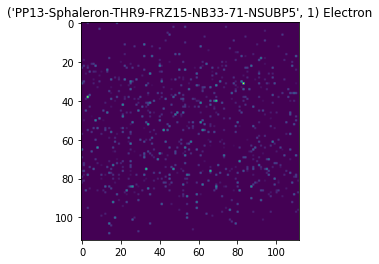

('PP13-Sphaleron-THR9-FRZ15-NB33-71-NSUBP5', 2)
510


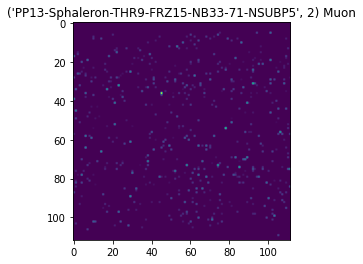

('PP13-Sphaleron-THR9-FRZ15-NB33-71-NSUBP5', 3)
1709


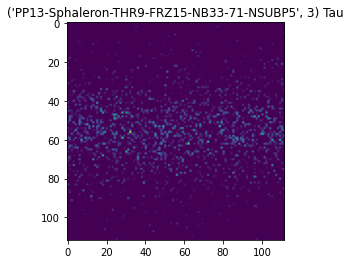

('PP13-Sphaleron-THR9-FRZ15-NB33-71-NSUBP5', 4)
8839


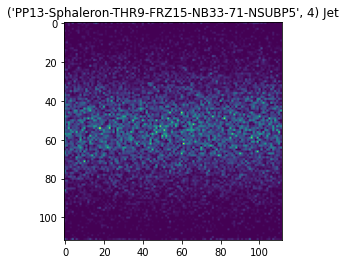

('PP13-Sphaleron-THR9-FRZ15-NB33-71-NSUBP5', 6)
112


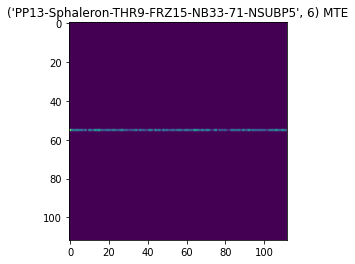

In [169]:
"""
for dataset in dataSets:
  for idx, data in enumerate(dataset.data):
    objCounts = [0 for x in range(0,7)]
    for obj in data:
      objCounts[obj[0]] += 1
    if objCounts[1] > 0 and objCounts[2] > 0 and objCounts[4] > 0:
      electronImage= images[(dataset.fileName, idx, 1)]
      muonImage = images[(dataset.fileName, idx, 2)]
      jetsImage = images[(dataset.fileName, idx, 4)]
      mergedImage = mergeImages(electronImage, muonImage, jetsImage)
      plt.imshow(mergedImage)
      break
"""
images = {}
eta2D = [getAllEtas(dataSet) for dataSet in dataSets]
imageHeight = 112
imageWidth = 112
maxEta = 2.5 #*max(standardDeviance2D(eta2D))
minEta = -2.5 #*max(standardDeviance2D(eta2D))
maxPhi = 3.14
minPhi = -3.14

for dataSet in dataSets:
  (objTypeToMaxVal, binnedImages) = createEtaPhiBinnedImages(dataSet, imageHeight, imageWidth, maxEta, minEta, maxPhi, minPhi)
  normalizedImages = normalizeEnergyImages(objTypeToMaxVal, binnedImages)
  images.update(normalizedImages)

objectImages = {} # map fra (filename, objectType) til map fra (x, y) til energi
for imageKey in images:
  filename, eventNr, objectType = imageKey
  image = images[imageKey]
  currentImageForObj = objectImages.get((filename, objectType), {})
  for coords in image:
    currentImageForObj[(coords)] = image[(coords)] + currentImageForObj.get((coords), 0)
  objectImages[(filename, objectType)] = currentImageForObj
for imageKey in objectImages:
  filename, objectType = imageKey
  objectTypeHumanReadable = objectMapping[objectType]
  print(imageKey)
  print(len(objectImages[(imageKey)]))
  plt.title(f"{imageKey} {objectTypeHumanReadable}")
  plt.imshow(fillBlanksInImage(objectImages[(imageKey)], imageHeight, imageWidth))
  startEndX = [0, imageWidth-1]
  startEndY = [imageHeight/2, imageWidth/2]
  #plt.plot(startEndX, startEndY)
  plt.show()
  #print(objectImages[(imageKey)])


